<a href="https://colab.research.google.com/github/mrFahrenhiet/IPL-Dashboard/blob/master/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "shreyanshgupta" # username from the json file
os.environ['KAGGLE_KEY'] = "53c4292282781654b84c32cbb8cb1ea0" # key from the json file
!kaggle datasets download -d saurav9786/indian-premier-league-match-analysis
!unzip 'indian-premier-league-match-analysis.zip'

  0% 0.00/16.5k [00:00<?, ?B/s]
100% 16.5k/16.5k [00:00<00:00, 28.7MB/s]
Archive:  indian-premier-league-match-analysis.zip
  inflating: matches.csv             


In [ ]:
pd.set_option('display.max_columns',102)

In [ ]:
df = pd.read_csv('/content/matches.csv')

In [ ]:
df.head(n=10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,9/4/2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,9/4/2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,10/4/2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,11/4/2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,12/4/2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [ ]:
sum = df.isna().sum()

In [ ]:
prcntge  = (df.isna().sum()/df.isna().count())*100

In [ ]:
pd.concat([sum,prcntge], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
id,0,0.000000
season,0,0.000000
city,7,1.100629
date,0,0.000000
team1,0,0.000000
team2,0,0.000000
toss_winner,0,0.000000
toss_decision,0,0.000000
result,0,0.000000
dl_applied,0,0.000000


In [ ]:
df.drop(columns='umpire3',inplace=True,axis=1)
df.dropna(inplace=True)

In [ ]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,9/4/2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,22/05/16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,24/05/16,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,25/05/16,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,27/05/16,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


In [ ]:
df.to_json("./data.json",orient="index")

In [ ]:
df.to_csv("./ipl.csv")

In [ ]:
sns.set_style('dark')

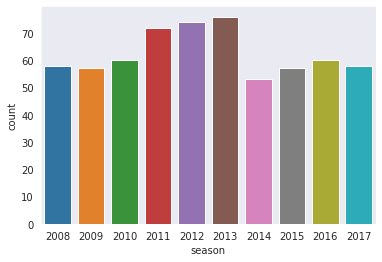

In [ ]:
sns.countplot(df.season)
# No of matches played per season

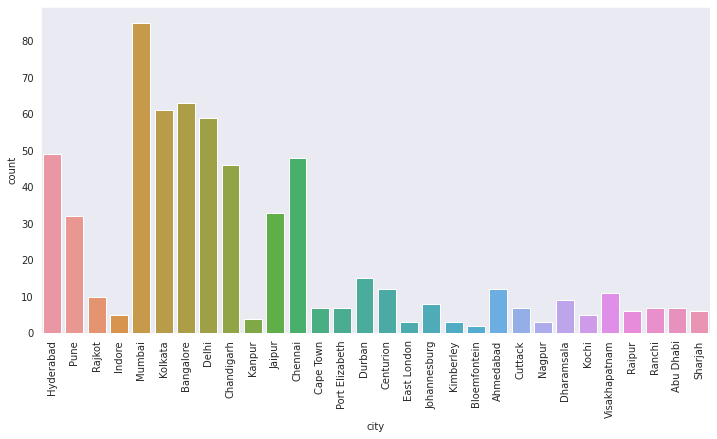

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='city', data=df)
plt.xticks(rotation='vertical')
plt.show()
# Number matches played in a city

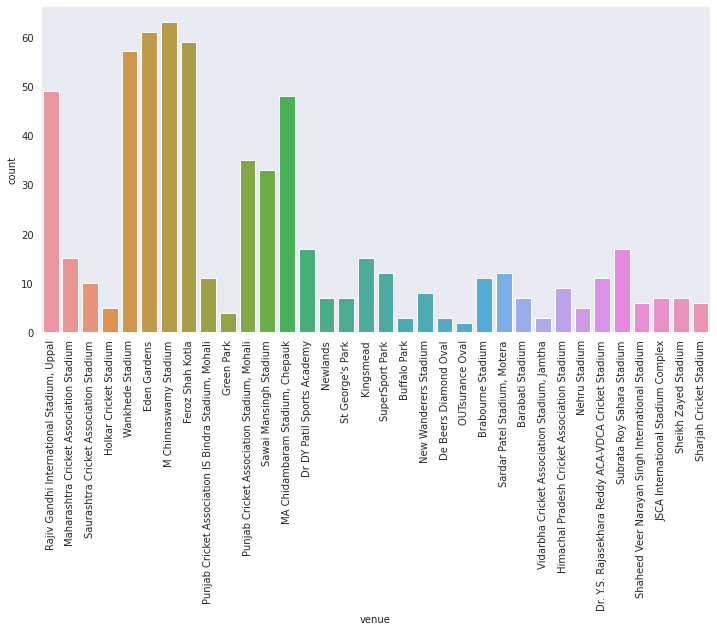

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df.venue)
plt.xticks(rotation='vertical')
plt.show()
# Matches played in a stadium

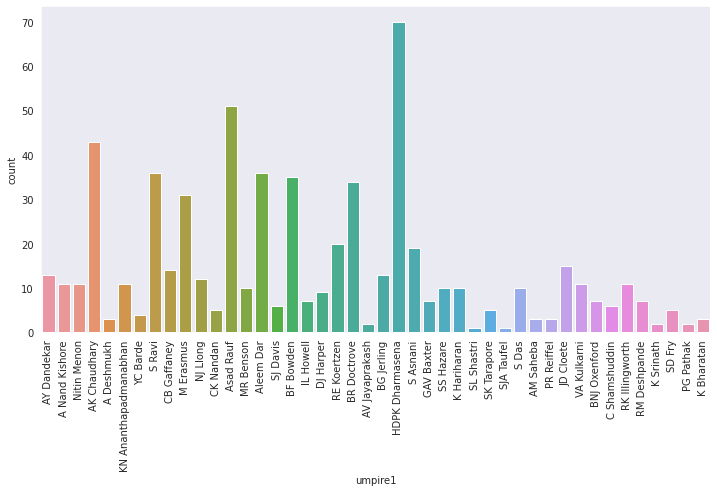

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df.umpire1)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
x = np.unique(df.venue.values,return_counts=True)
np.argmax(x[1])
print(x[0][13],x[1][13])
print(63/df.venue.count())

M Chinnaswamy Stadium 63
0.1008


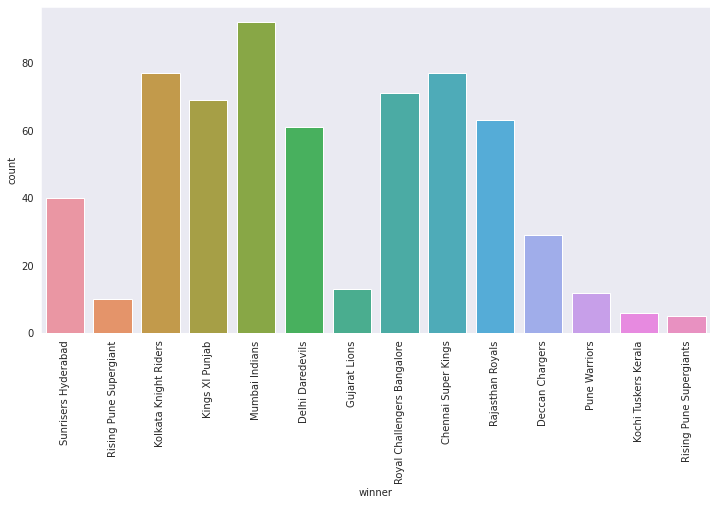

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=df)
plt.xticks(rotation='vertical')
plt.show()
# Matches played per team

In [ ]:
teams = np.unique(df.team1.values)
print(teams)

['Chennai Super Kings' 'Deccan Chargers' 'Delhi Daredevils'
 'Gujarat Lions' 'Kings XI Punjab' 'Kochi Tuskers Kerala'
 'Kolkata Knight Riders' 'Mumbai Indians' 'Pune Warriors'
 'Rajasthan Royals' 'Rising Pune Supergiant' 'Rising Pune Supergiants'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad']


In [ ]:
win = []
for team in teams:
  if team!='Rising Pune Supergiant' and team!="Rising Pune Supergiants":
    x = df[df.team1==team].id.count()
    y = df[df.team2==team].id.count()
    z = df[(df.toss_winner==df.winner)&(df.winner==team)].id.count()
    print(team, z/(x+y))
    win.append(z/(x+y))

Chennai Super Kings 0.32558139534883723
Deccan Chargers 0.25333333333333335
Delhi Daredevils 0.2323943661971831
Gujarat Lions 0.3333333333333333
Kings XI Punjab 0.1836734693877551
Kochi Tuskers Kerala 0.2857142857142857
Kolkata Knight Riders 0.29931972789115646
Mumbai Indians 0.3116883116883117
Pune Warriors 0.06666666666666667
Rajasthan Royals 0.29310344827586204
Royal Challengers Bangalore 0.22448979591836735
Sunrisers Hyderabad 0.21621621621621623


In [ ]:
x = df[df.team1=='Rising Pune Supergiant'].id.count() + df[df.team1=='Rising Pune Supergiants'].id.count()
y = df[df.team2=='Rising Pune Supergiant'].id.count() + df[df.team2=='Rising Pune Supergiants'].id.count()
z = df[(df.toss_winner==df.winner)&(df.winner=='Rising Pune Supergiant')].id.count() +df[(df.toss_winner==df.winner)&(df.winner=='Rising Pune Supergiants')].id.count()
print('Rising Pune Supergiant', z/(x+y))
win.append(z/(x+y))

Rising Pune Supergiant 0.26666666666666666


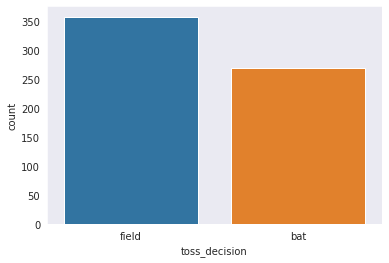

In [ ]:
sns.countplot(df.toss_decision)
plt.show()
#Toss decisions

In [ ]:
df[df.toss_winner==df.winner]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,9/4/2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,9/4/2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,630,2016,Kanpur,21/05/16,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,SK Raina,Green Park,AK Chaudhary,CK Nandan
631,632,2016,Raipur,22/05/16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,24/05/16,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
634,635,2016,Delhi,27/05/16,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


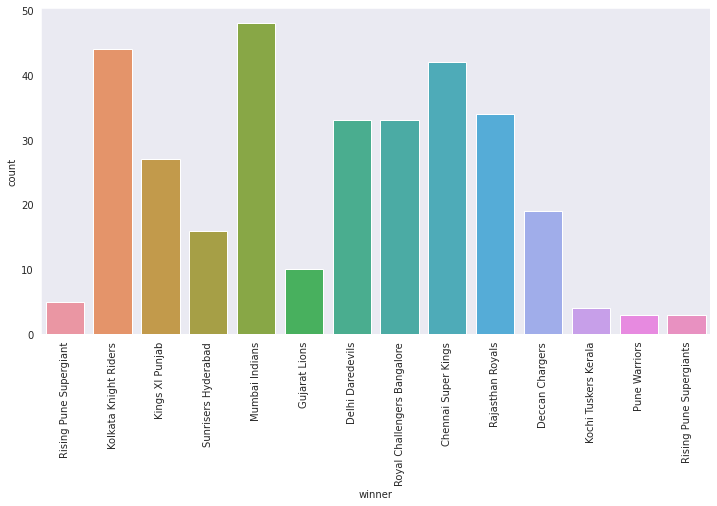

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df[df.toss_winner==df.winner].winner)
plt.xticks(rotation='vertical')
plt.show()

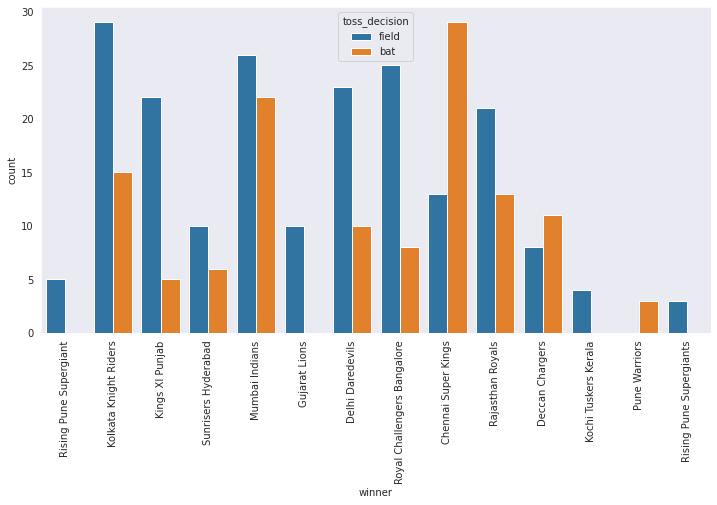

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df[df.toss_winner==df.winner].winner,hue=df[df.toss_winner==df.winner].toss_decision)
plt.xticks(rotation='vertical')
plt.show()

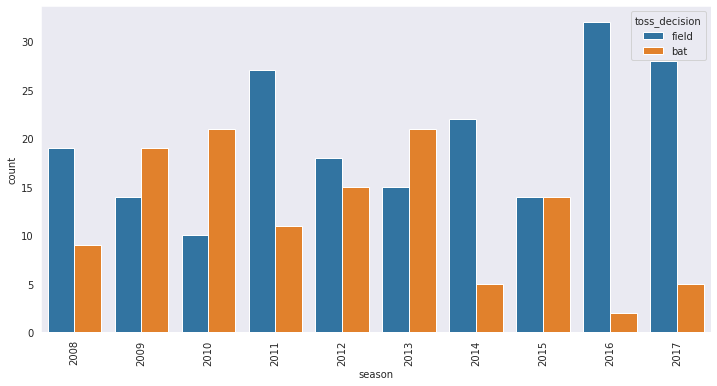

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df[df.toss_winner==df.winner].season, hue=df[df.toss_winner==df.winner].toss_decision)
plt.xticks(rotation='vertical')
plt.show()

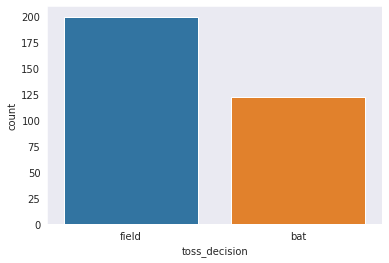

In [ ]:
sns.countplot(df[df.toss_winner==df.winner].toss_decision)
plt.show()
# Toss decision which results in Win

In [ ]:
x = df[df.toss_winner==df.winner].toss_decision.values

In [ ]:
np.unique(x,return_counts=True)

(array(['bat', 'field'], dtype=object), array([122, 199]))

In [ ]:
199/(199+122)

0.6199376947040498

In [ ]:
x = df[df.toss_winner==df.winner].city.count()/df.city.count()
x*=100

In [ ]:
print(f"Probability of winning a match after winning the toss is: {round(x,2)}%")

Probability of winning a match after winning the toss is: 51.36%


In [ ]:
mofthem = df.player_of_match.value_counts()[:15]

In [ ]:
df.shape

(625, 17)

In [ ]:
mofthem

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
RG Sharma         14
MS Dhoni          13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
V Sehwag          11
DR Smith          11
V Kohli           11
SR Watson         10
JH Kallis         10
Name: player_of_match, dtype: int64

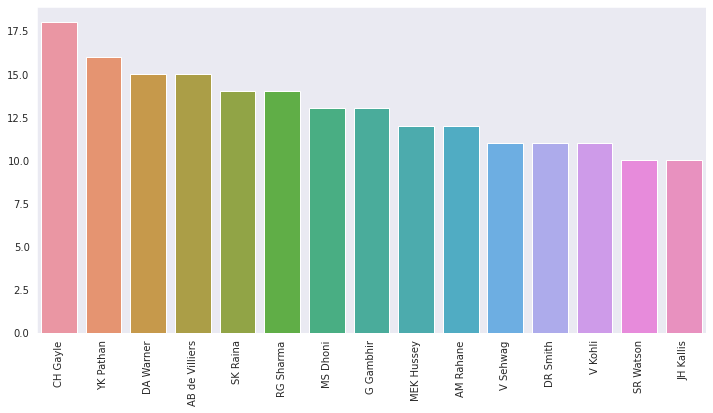

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x= mofthem.index, y=mofthem.values)
plt.xticks(rotation='vertical')
plt.show()

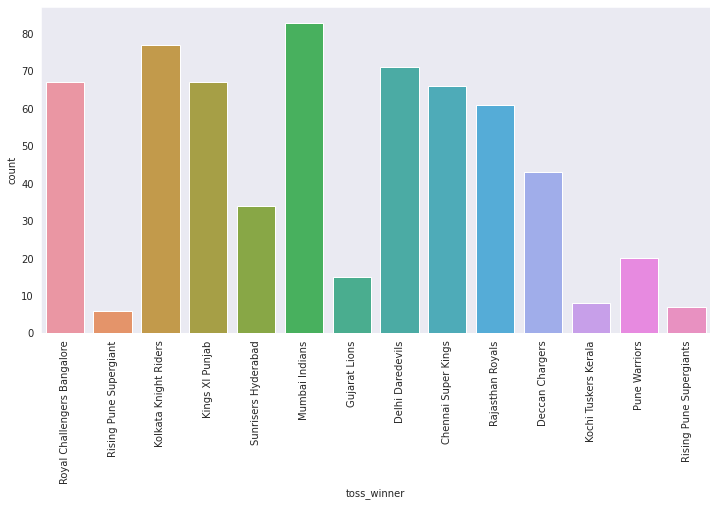

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df.toss_winner)
plt.xticks(rotation='vertical')
plt.show()

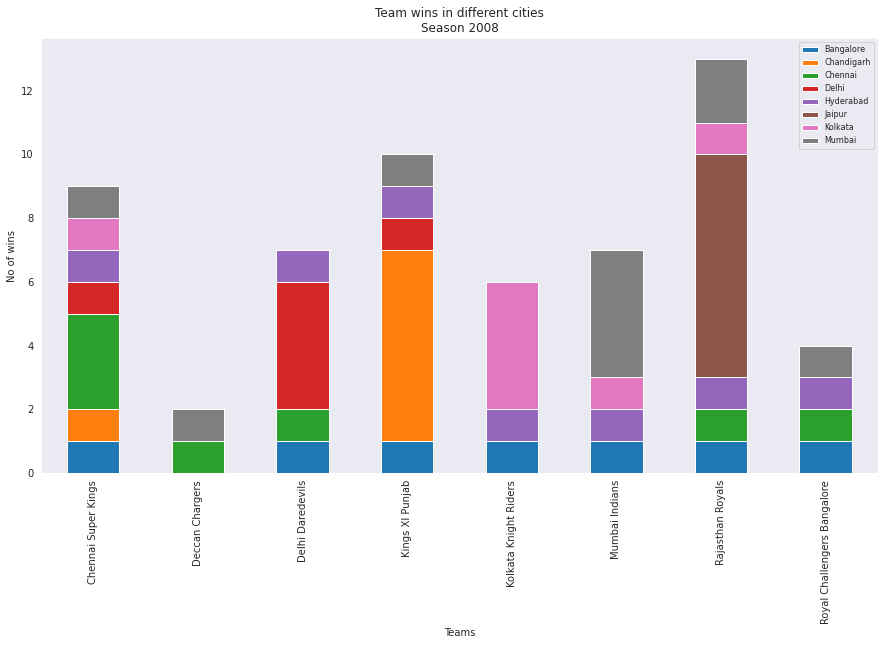

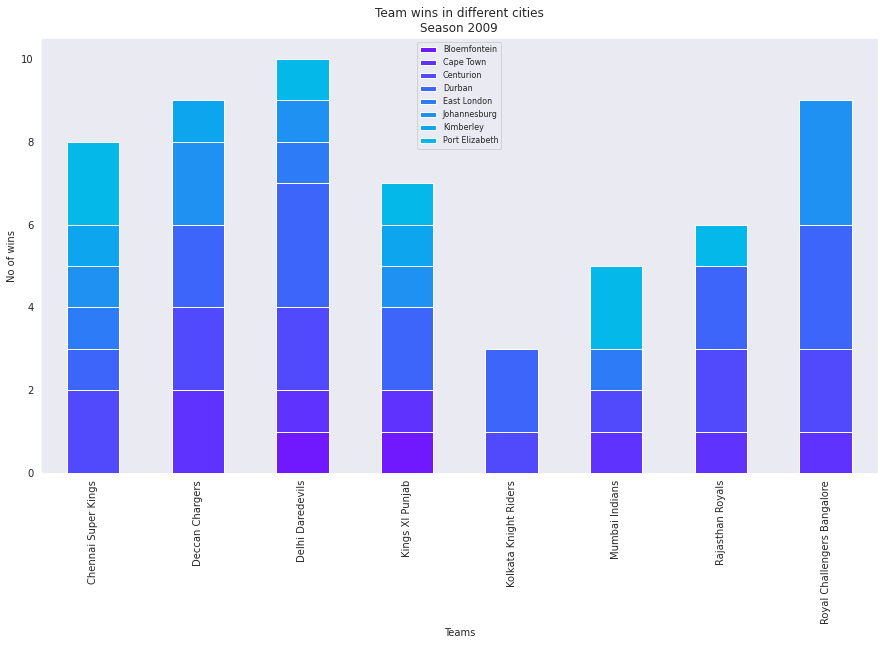

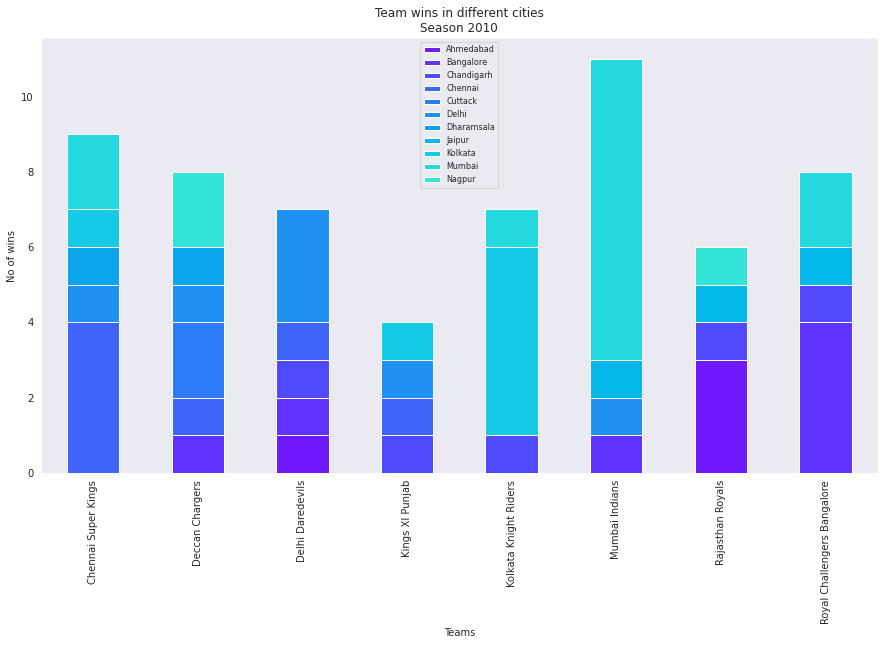

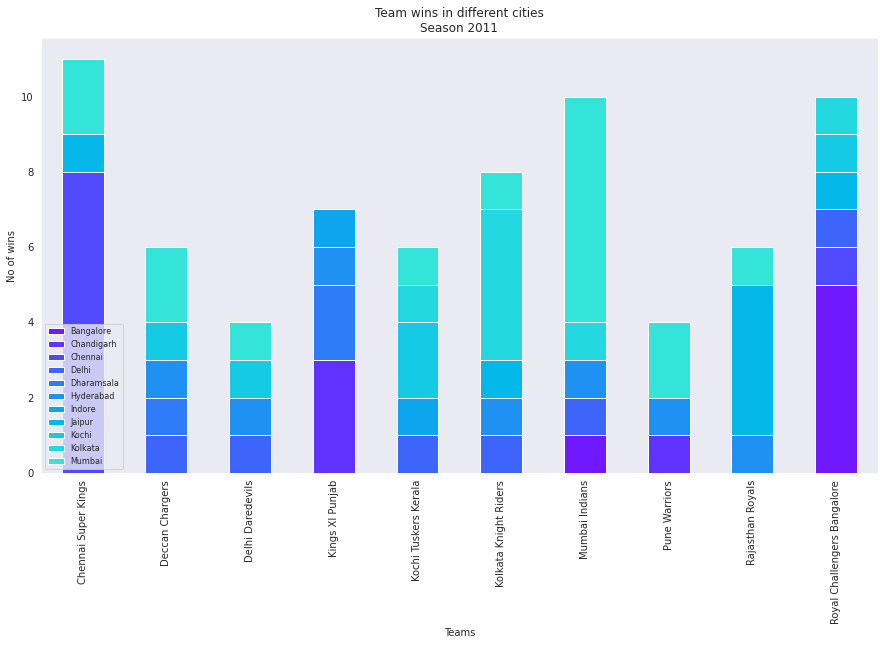

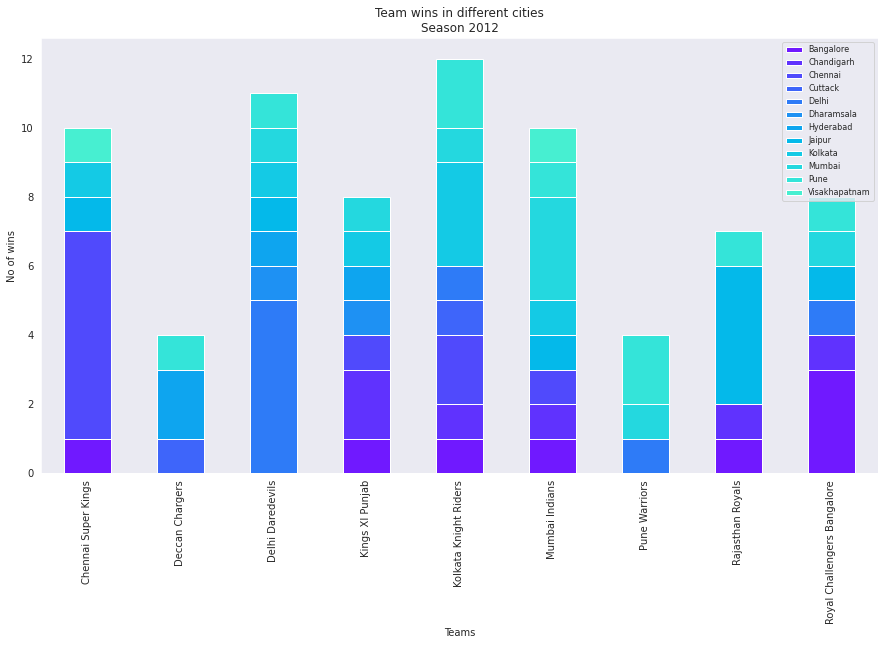

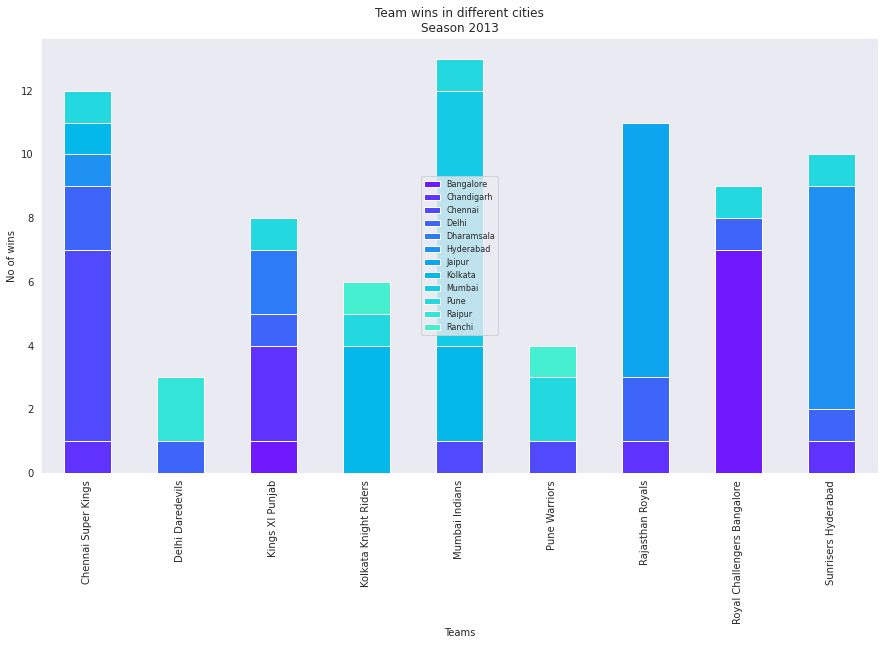

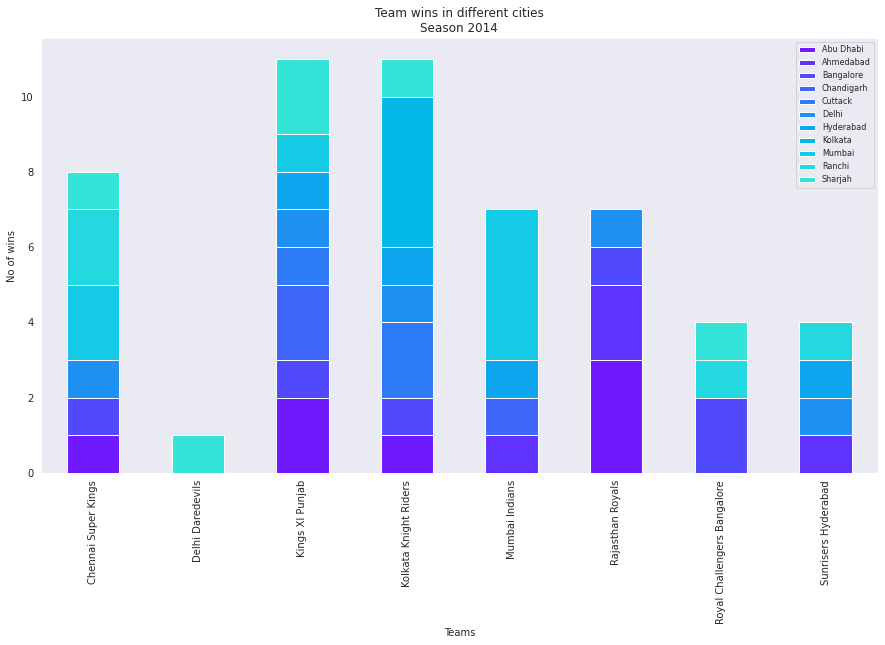

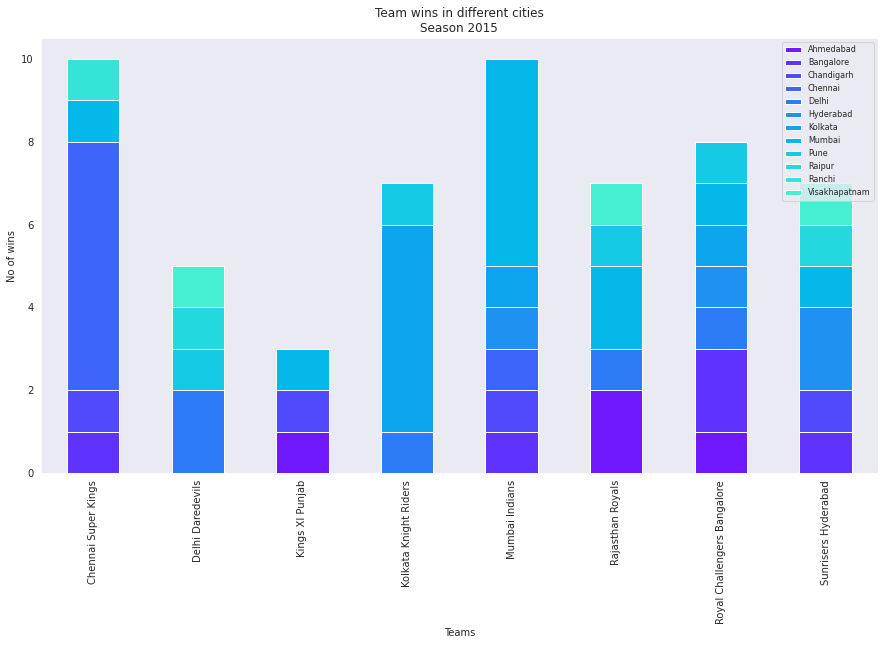

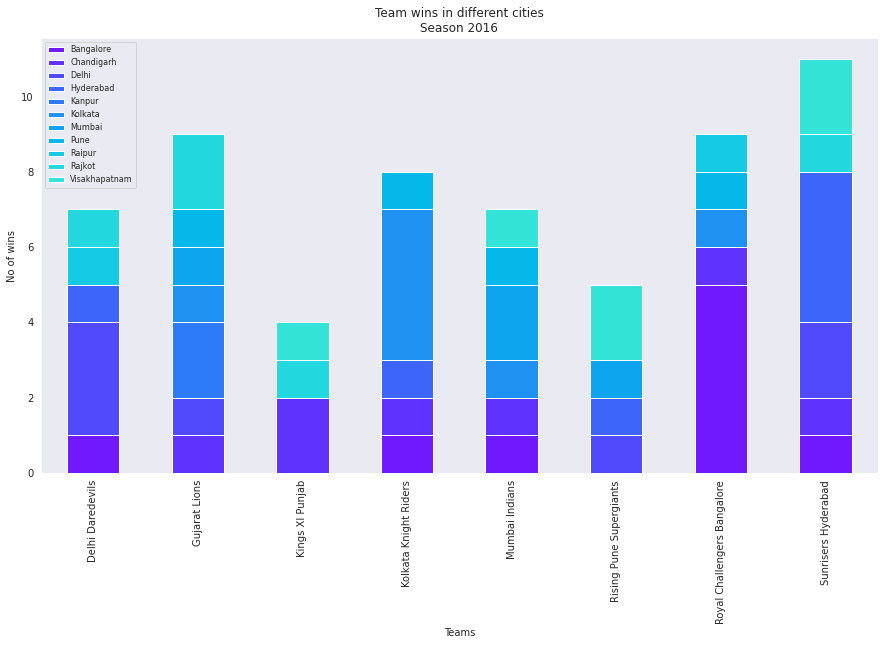

In [ ]:
i,n = 2008,2017
while i<n:
  dfWinCity = df[df.season==i].groupby(['winner','city'])['id'].count().unstack()
  plot = dfWinCity.plot(
      kind='bar', 
      stacked=True,
      title=f"Team wins in different cities\nSeason {i}",
      figsize=(15, 8)
    )
  sns.set_palette("rainbow", len(df['city'].unique()))
  plot.set_xlabel("Teams")
  plot.set_ylabel("No of wins")
  plot.legend(loc='best', prop={'size':8})
  plt.show()
  i+=1

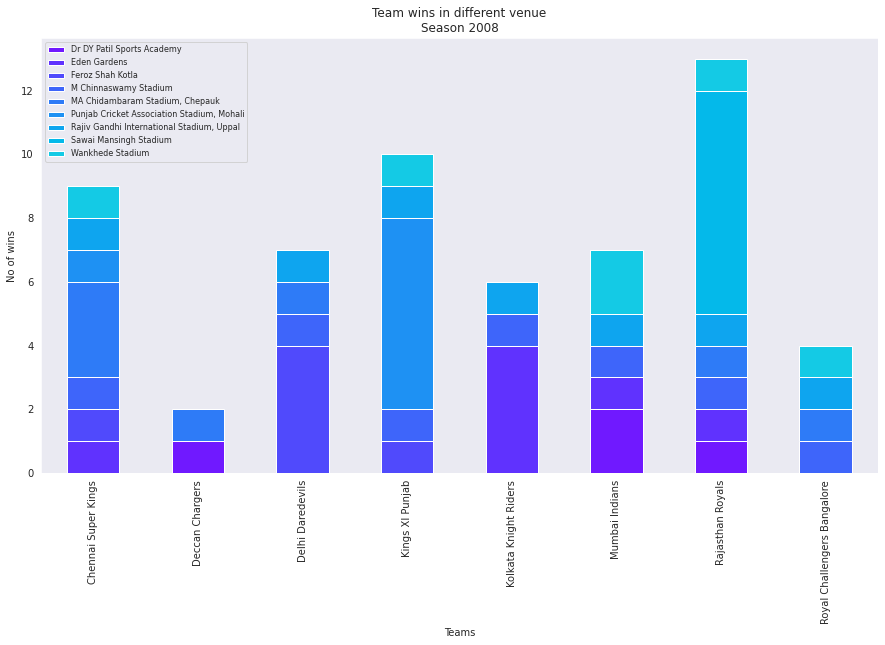

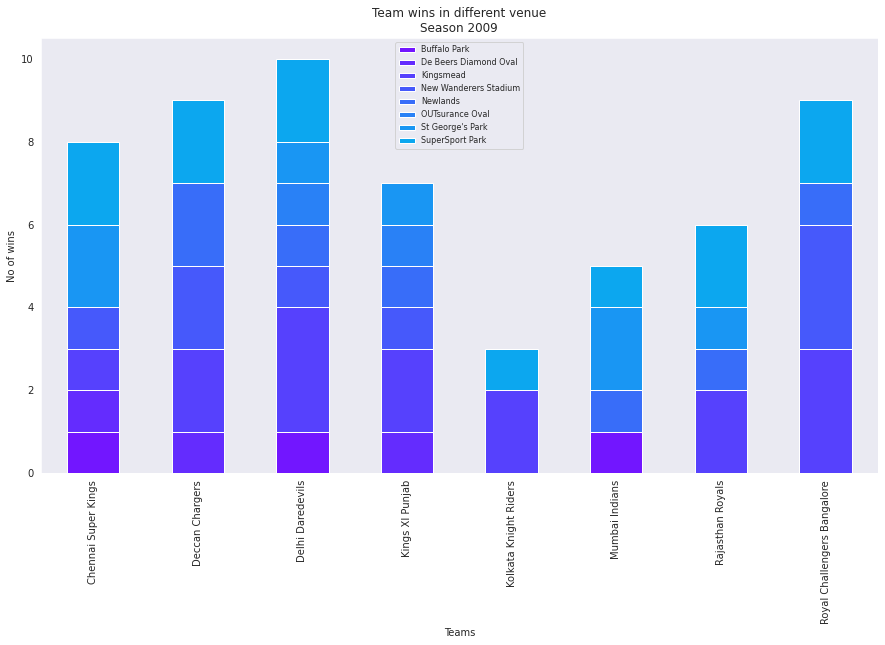

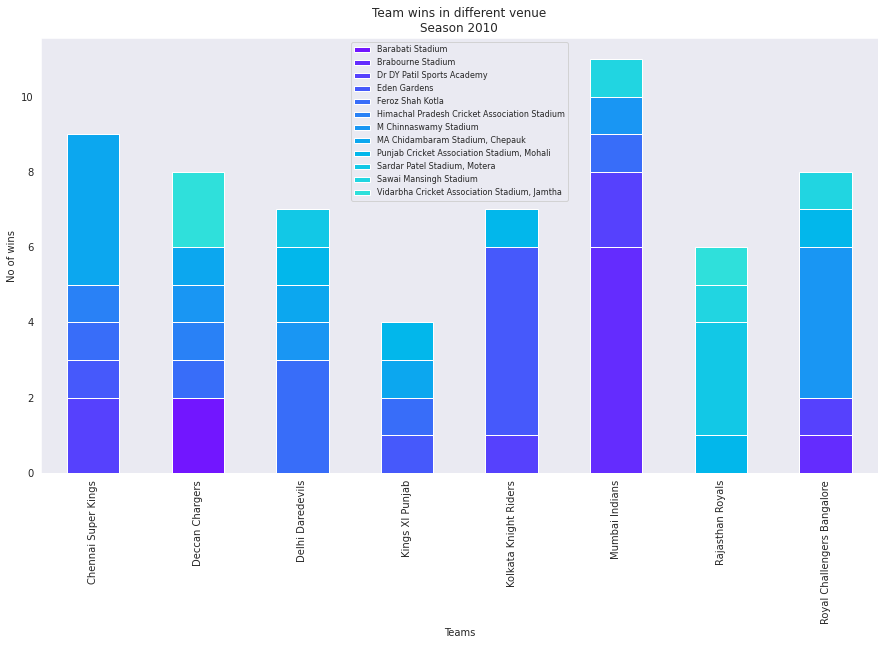

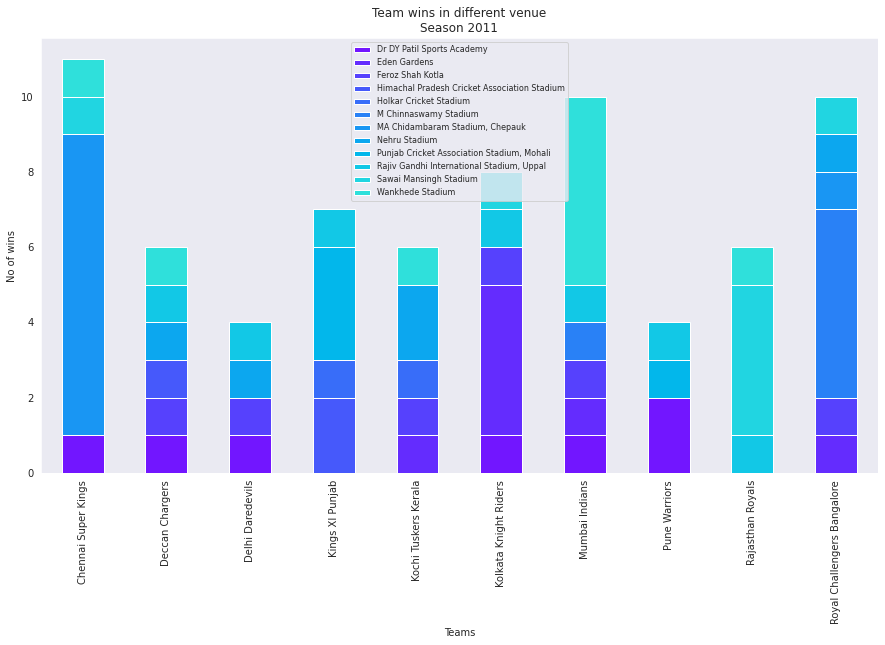

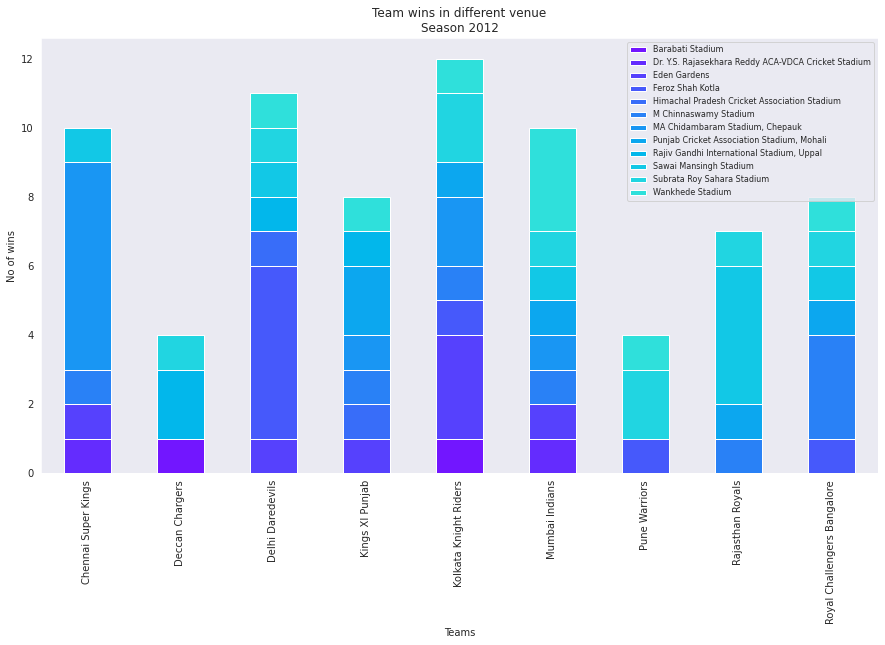

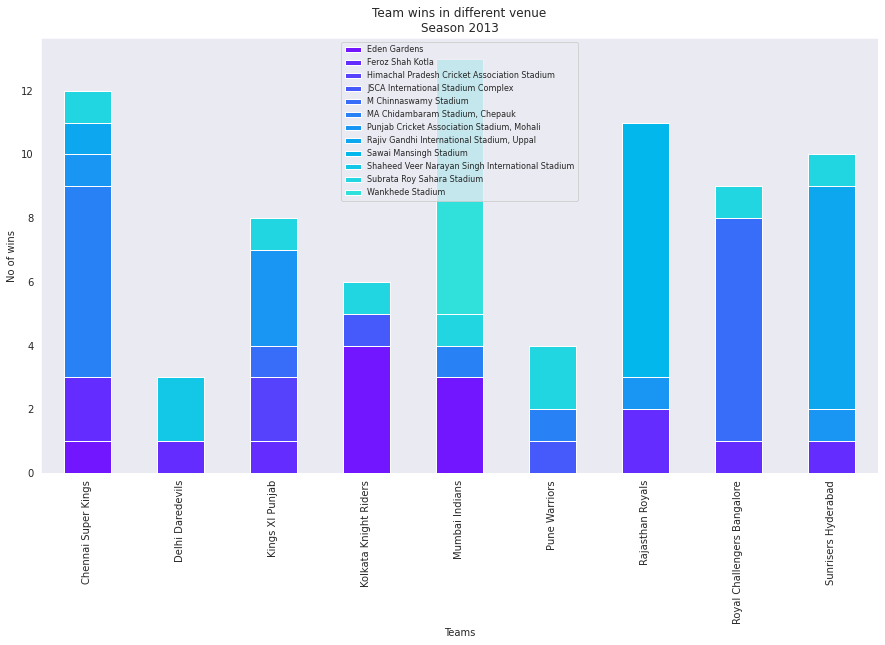

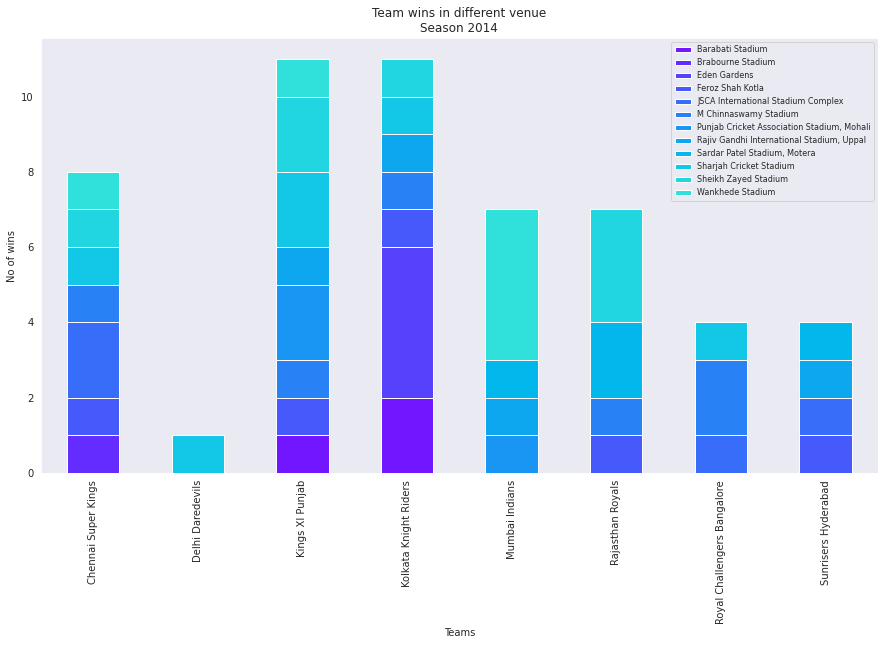

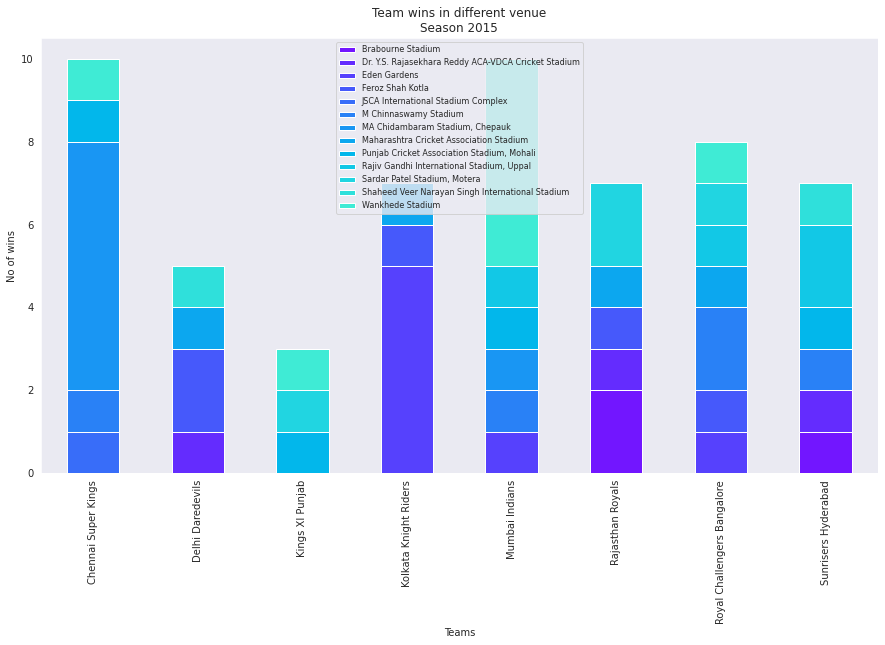

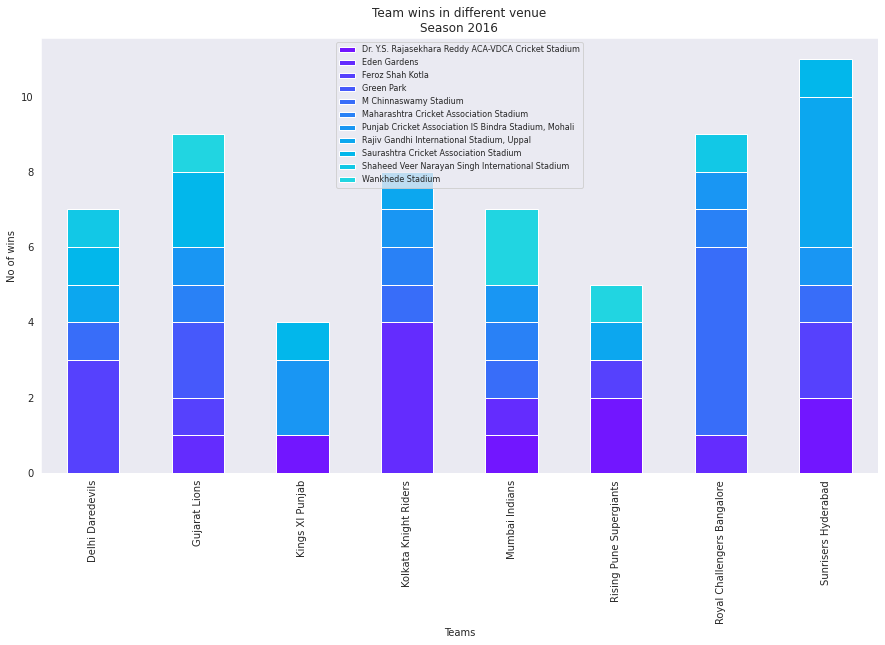

In [ ]:
i,n = 2008,2017
while i<n:
  dfWinCity = df[df.season==i].groupby(['winner','venue'])['id'].count().unstack()
  plot = dfWinCity.plot(
      kind='bar', 
      stacked=True,
      title=f"Team wins in different venue\nSeason {i}",
      figsize=(15, 8)
    )
  sns.set_palette("rainbow", len(df['venue'].unique()))
  plot.set_xlabel("Teams")
  plot.set_ylabel("No of wins")
  plot.legend(loc='best', prop={'size':8})
  plt.show()
  i+=1

In [ ]:
dl = df[df.dl_applied==1]
dl.count()

id                 16
season             16
city               16
date               16
team1              16
team2              16
toss_winner        16
toss_decision      16
result             16
dl_applied         16
winner             16
win_by_runs        16
win_by_wickets     16
player_of_match    16
venue              16
umpire1            16
umpire2            16
dtype: int64

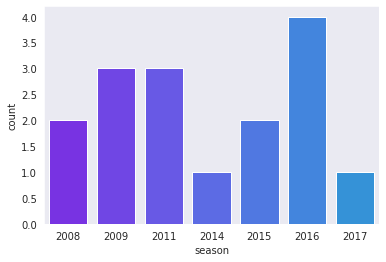

In [ ]:
sns.countplot(dl.season)